## 1.3 多维数组

In [1]:
import numpy as np
a = np.array([1,2,3,4,5,6])
b = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
print(a)
print(b)


[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


a是一维数组，b是二维数组

一维数组的定义：当数组中每个元素都只带有一个下标时，称这样的数组为一维数组，一维数组实质上是一组相同类型数据的线性集合。

二维数组的定义：二维数组本质上是以数组作为数组元素的数组，即“数组的数组”。

In [2]:
print(a.shape)  # 返回一个元组，查看矩阵或者数组的维数(有几个数就是几维),就是几乘几的数组
print(b.shape)
print(a.ndim)   # 返回数组维度数目
print(b.ndim)
print(a.size)   # 返回数组中所有元素的数目
print(b.size)
print(a.dtype)  # 返回数组中所有元素的数据类型
print(b.dtype)

(6,)
(2, 3)
1
2
6
6
int32
int32


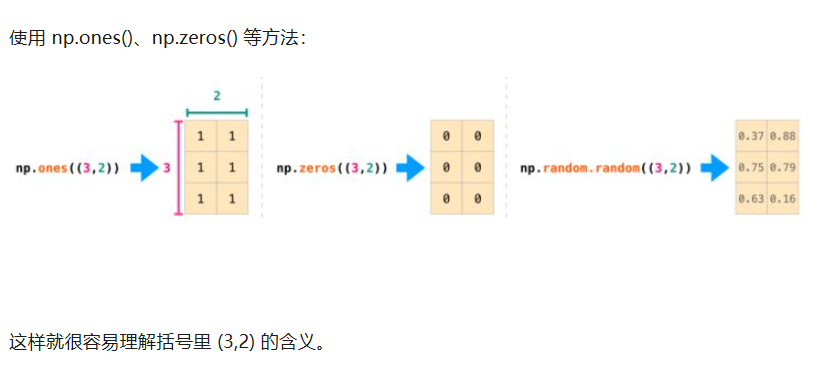

**Numpy 不仅可以处理上述的一维数组和二维矩阵（二维数组我们习惯叫它为矩阵），还可以处理任意 N 维的数组，方法也大同小异。**

### 1.3.1 reshape不改值修改形状

In [5]:
import numpy as np
import random
a = np.arange(10).reshape(2,5)      # 变成2行5列
b = a.reshape(10)                             # 变回1行1列
c = a.flatten()                                    # 展开成一维
print(f'a:{a}\nb:{b}\nc:{c}')

a:[[0 1 2 3 4]
 [5 6 7 8 9]]
b:[0 1 2 3 4 5 6 7 8 9]
c:[0 1 2 3 4 5 6 7 8 9]


### 1.3.2 数组计算

凡是形状一样的数组，假设数组a和数组b，可以直接用a+b 或 a-b

In [8]:
import numpy as np
import random
a = np.arange(10).reshape(2,5)
b = np.random.randn(2,5)
print(a)
print(b)
print(a+b)
print(a-b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0.53888932 -1.91502599 -0.83278844  0.83122247  1.05720021]
 [ 1.82309633 -0.62383297 -0.81497573  0.84399428 -1.12891084]]
[[ 0.53888932 -0.91502599  1.16721156  3.83122247  5.05720021]
 [ 6.82309633  5.37616703  6.18502427  8.84399428  7.87108916]]
[[-0.53888932  2.91502599  2.83278844  2.16877753  2.94279979]
 [ 3.17690367  6.62383297  7.81497573  7.15600572 10.12891084]]


a+1  数组中每个数都+1

a*2   数组中每个数都*2

a/2   数组中每个数都除2

注：如果分母为0，0/0返回nan，其它数/0返回inf

nan(NAN,Nan):not a number表示不是一个数字

inf(-inf,inf):infinity,inf表示正无穷，-inf表示负无穷

In [11]:
b/0

C:\Users\15126\AppData\Local\Temp\ipykernel_26988\2933543726.py:1: RuntimeWarning: divide by zero encountered in true_divide
  b/0


array([[ inf, -inf, -inf,  inf,  inf],
       [ inf, -inf, -inf,  inf, -inf]])

### 1.3.3 广播机制
广播机制使维度不同的数组可以操作，这个是numpy中比较重要的特性，稍微不注意也可能出错，因此应该十分注意。
广播机制发生在两种情况下：一种是两个数组的维数不相等，但是它们的后缘维度的轴长相符，另外一种是有一方的长度为1。
举例子说明：

In [14]:
#第一种情况
import numpy as np
arr1 = np.array([[0, 0, 0],
                 [1, 1, 1],
                 [2, 2, 2], 
                 [3, 3, 3]])  #arr1.shape = (4,3)
arr2 = np.array([1, 2, 3])    #arr2.shape = (3)
arr1+arr2
#解释：arr1二维（4，3），arr2一维（3,）后缘维度相同，即倒数第一个维度相同都为3可以自动扩充，进行相加。

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [15]:
#第二种情况
arr1 = np.array([[0, 0, 0],
                 [1, 1, 1],
                 [2, 2, 2], 
                 [3, 3, 3]])  #arr1.shape = (4,3)
arr2 = np.array([[1],[2],[3],[4]])  #arr2.shape = (4,1)
arr1+arr2
#解释：arr1二维（4，3）arr2二维（4，1）,满足维度相同，且有一个数组维度为1的条件，自动将arr2扩充为二维。

array([[1, 1, 1],
       [3, 3, 3],
       [5, 5, 5],
       [7, 7, 7]])

广播的原则:

        如果两个数组的后缘维度（trailing dimension，即从末尾开始算起的维度）的轴长度相符，或其中的一方的长度为1，则认为它们是广播兼容的。广播会在缺失和（或）长度为1的维度上进行。
        
       这句话乃是理解广播的核心。广播主要发生在两种情况，一种是两个数组的维数不相等，但是它们的后缘维度的轴长相符，另外一种是有一方的长度为1。

数组维度不同，后缘维度的轴长相符：

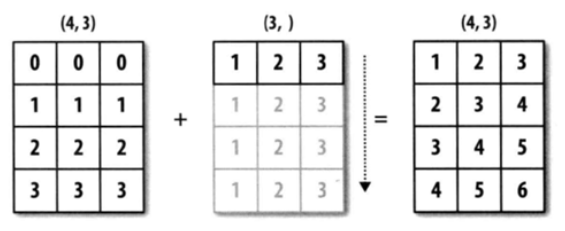

上例中x的shape为（4,3），y的shape为（3，）。可以说x是二维的，而y是一维的。但是它们的后缘维度相等，x的第二维长度为3，和y的维度相同。x和y的shape并不一样，但是它们可以执行相加操作，这就是通过广播完成的。

**同样的例子还有：**

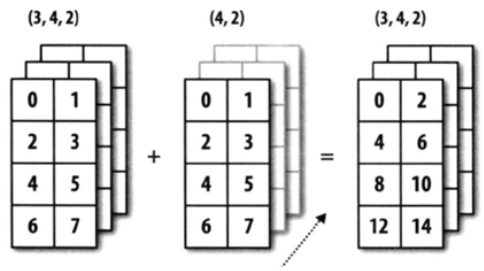

从上面的图可以看到，（3,4,2）和（4,2）的维度是不相同的，前者为3维，后者为2维。但是它们后缘维度的轴长相同，都为（4,2）。同样，还有一些例子：（4,2,3）和（2,3）是兼容的，（4,2,3）还和（3）是兼容的，后者需要在两个轴上面进行扩展。

**数组维度相同，其中有个轴为1：**

x的shape为（4,3），y的shape为（4,1），它们都是二维的，但是第二个数组在1轴上的长度为1，所以可以进行广播。

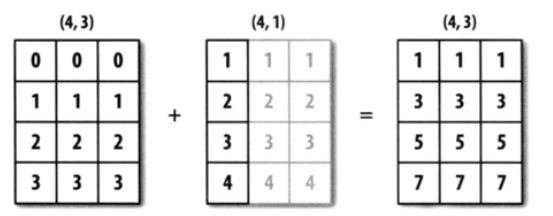

思考：

- [x] （3，2，3） 和 （2，3）

- [x] （3，2，3） 和 （3，）

- [x] （3，2，2） 和 （2，1）

- [ ] （3，2，3） 和 （2，4）

In [28]:
# （3，2，3） 和 （2，3）
a = np.arange(18).reshape((3,2,3))
print(f'a:{a}\n')
b = np.ones(6,dtype=np.int32).reshape((2,3))
print(f'b:{b}\n')

print(f'a-b:{a-b}')

a:[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]

b:[[1 1 1]
 [1 1 1]]

a-b:[[[-1  0  1]
  [ 2  3  4]]

 [[ 5  6  7]
  [ 8  9 10]]

 [[11 12 13]
  [14 15 16]]]


In [29]:
# （3，2，3） 和 （3,）
a = np.arange(18).reshape((3,2,3))
print(f'a:{a}\n')
b = np.ones(3,dtype=np.int32).reshape((3,))
print(f'b:{b}\n')

print(f'a-b:{a-b}')

a:[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]

b:[1 1 1]

a-b:[[[-1  0  1]
  [ 2  3  4]]

 [[ 5  6  7]
  [ 8  9 10]]

 [[11 12 13]
  [14 15 16]]]


In [30]:
# （3，2，3） 和 （2，1）
a = np.arange(18).reshape((3,2,3))
print(f'a:{a}\n')
b = np.ones(2,dtype=np.int32).reshape((2,1))
print(f'b:{b}\n')

print(f'a-b:{a-b}')

a:[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]

b:[[1]
 [1]]

a-b:[[[-1  0  1]
  [ 2  3  4]]

 [[ 5  6  7]
  [ 8  9 10]]

 [[11 12 13]
  [14 15 16]]]


In [31]:
# （3，2，3） 和 （2，4）
a = np.arange(18).reshape((3,2,3))
print(f'a:{a}\n')
b = np.ones(8,dtype=np.int32).reshape((2,4))
print(f'b:{b}\n')

print(f'a-b:{a-b}')

a:[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]

b:[[1 1 1 1]
 [1 1 1 1]]



ValueError: operands could not be broadcast together with shapes (3,2,3) (2,4) 